<a href="https://colab.research.google.com/github/Rodrigo-ABE/TKSAT-1_Optimization_Project/blob/main/Random_Forest_Maniobra_Sur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar Librerias y cargar Data Set

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

file_path = '/content/DATA_SET_SUR_V2_Modificado.csv'
df = pd.read_csv(file_path)

Definir variables de entrada y salida , dividir el conjunto de datos en entrenamiento y prueba

In [2]:
X = df.iloc[:, :14]  # Columnas de entrada (14 primeras columnas)
y = df.iloc[:, 14:19]  # Columnas de salida (5 últimas columnas)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Definir el Modelo

In [3]:
rf_model = RandomForestRegressor(
    n_estimators=100,     # Número de árboles en el bosque
    max_depth=15,         # Profundidad máxima de los árboles
    random_state=42,      # Para reproducibilidad
    n_jobs=-1             # Usar todos los núcleos de la CPU
)


Entrenamiento , Prediccion y Evaluacion

In [4]:
# Entrenar el modelo
rf_model.fit(X_train, y_train)

# 5Predecir los valores de salida para el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Evaluar el modelo para Fuel Consumed y Delta VN
# Extraer las columnas correspondientes a Fuel Consumed (columna 0) y Delta VN (columna 3)

fuel_test = y_test.iloc[:, 0]
fuel_pred = y_pred[:, 0]

delta_vn_test = y_test.iloc[:, 3]
delta_vn_pred = y_pred[:, 3]

Calcular Metricas

In [5]:
# Calcular las métricas para Fuel Consumed
mae_fuel = mean_absolute_error(fuel_test, fuel_pred)
mse_fuel = mean_squared_error(fuel_test, fuel_pred)
rmse_fuel = np.sqrt(mse_fuel)
error_relativo_fuel = np.mean(np.abs((fuel_test - fuel_pred) / fuel_test)) * 100

# Calcular las métricas para Delta VN
mae_delta_vn = mean_absolute_error(delta_vn_test, delta_vn_pred)
mse_delta_vn = mean_squared_error(delta_vn_test, delta_vn_pred)
rmse_delta_vn = np.sqrt(mse_delta_vn)
error_relativo_delta_vn = np.mean(np.abs((delta_vn_test - delta_vn_pred) / delta_vn_test)) * 100

Resultados

In [6]:
print("--- Métricas para Fuel Consumed ---")
print(f"MAE: {mae_fuel:.4f}")
print(f"MSE: {mse_fuel:.4f}")
print(f"RMSE: {rmse_fuel:.4f}")
print(f"Error relativo (%): {error_relativo_fuel:.2f}%")

print("\n--- Métricas para Delta VN ---")
print(f"MAE: {mae_delta_vn:.4f}")
print(f"MSE: {mse_delta_vn:.4f}")
print(f"RMSE: {rmse_delta_vn:.4f}")
print(f"Error relativo (%): {error_relativo_delta_vn:.2f}%")

# Mostrar las predicciones y valores reales para las primeras 5 muestras
print("\n--- Predicciones vs Valores Reales para Fuel Consumed ---")
for i in range(5):
    print(f"Predicción: {fuel_pred[i]:.4f}, Valor Real: {fuel_test.values[i]:.4f}")

print("\n--- Predicciones vs Valores Reales para Delta VN ---")
for i in range(5):
    print(f"Predicción: {delta_vn_pred[i]:.4f}, Valor Real: {delta_vn_test.values[i]:.4f}")

--- Métricas para Fuel Consumed ---
MAE: 0.1538
MSE: 0.0611
RMSE: 0.2473
Error relativo (%): 5.34%

--- Métricas para Delta VN ---
MAE: 0.1322
MSE: 0.0751
RMSE: 0.2741
Error relativo (%): 4.34%

--- Predicciones vs Valores Reales para Fuel Consumed ---
Predicción: 2.5243, Valor Real: 2.4250
Predicción: 3.7817, Valor Real: 4.2700
Predicción: 4.1389, Valor Real: 4.1330
Predicción: 2.6115, Valor Real: 2.9860
Predicción: 4.1675, Valor Real: 4.2080

--- Predicciones vs Valores Reales para Delta VN ---
Predicción: -2.7915, Valor Real: -2.7420
Predicción: -3.2425, Valor Real: -4.2630
Predicción: -4.2870, Valor Real: -4.3720
Predicción: -2.7590, Valor Real: -2.7440
Predicción: -4.2423, Valor Real: -4.2380


Graficas

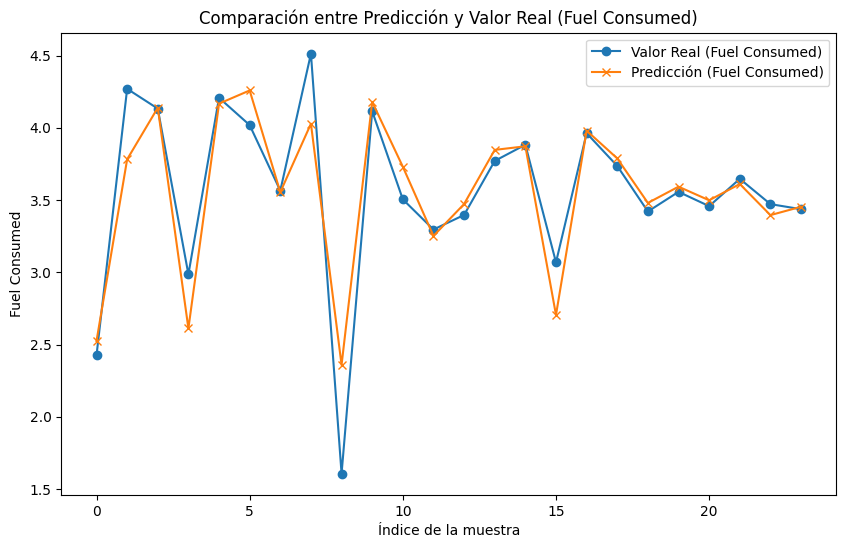

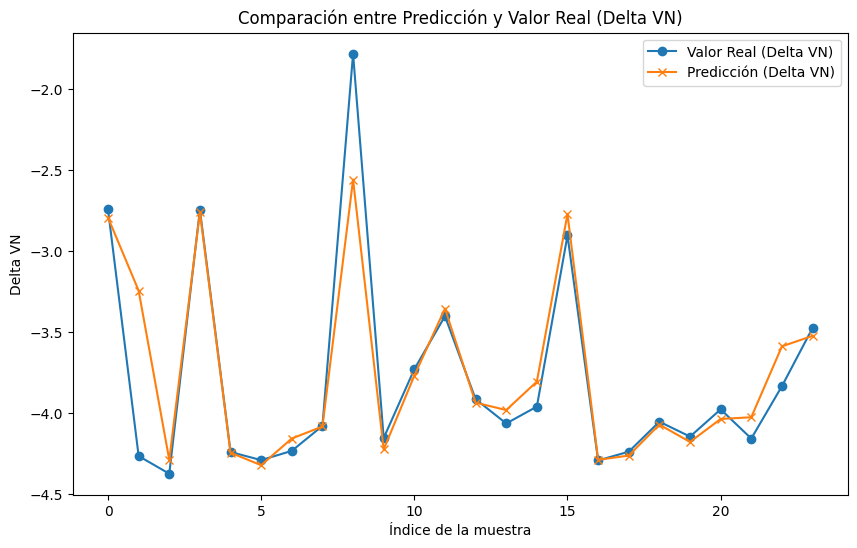

In [7]:
import matplotlib.pyplot as plt

# Comparar los valores reales y predichos para Fuel Consumed
plt.figure(figsize=(10, 6))
plt.plot(fuel_test.values[:50], label='Valor Real (Fuel Consumed)', marker='o')
plt.plot(fuel_pred[:50], label='Predicción (Fuel Consumed)', marker='x')
plt.xlabel('Índice de la muestra')
plt.ylabel('Fuel Consumed')
plt.title('Comparación entre Predicción y Valor Real (Fuel Consumed)')
plt.legend()
plt.show()

# Comparar los valores reales y predichos para Delta VN
plt.figure(figsize=(10, 6))
plt.plot(delta_vn_test.values[:50], label='Valor Real (Delta VN)', marker='o')
plt.plot(delta_vn_pred[:50], label='Predicción (Delta VN)', marker='x')
plt.xlabel('Índice de la muestra')
plt.ylabel('Delta VN')
plt.title('Comparación entre Predicción y Valor Real (Delta VN)')
plt.legend()
plt.show()


Mapa de Calor

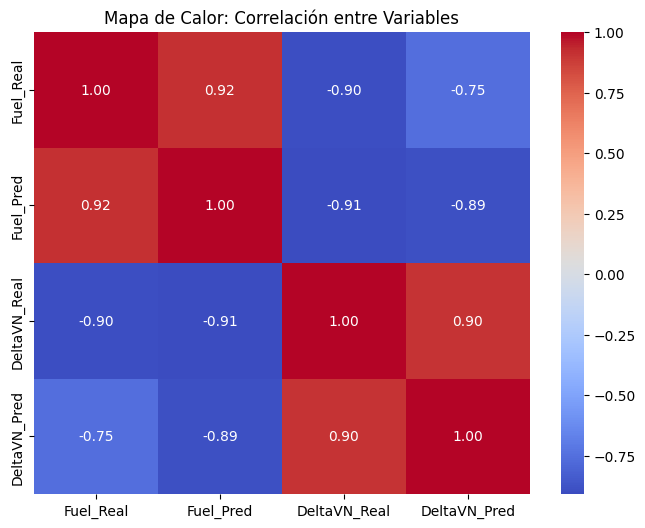

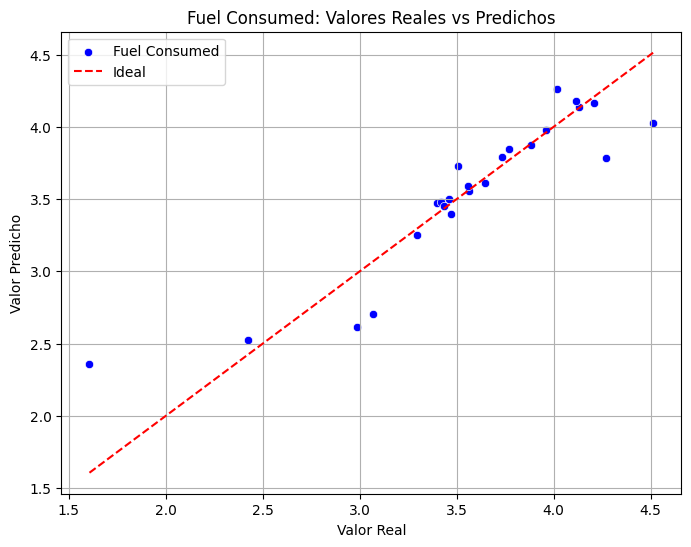

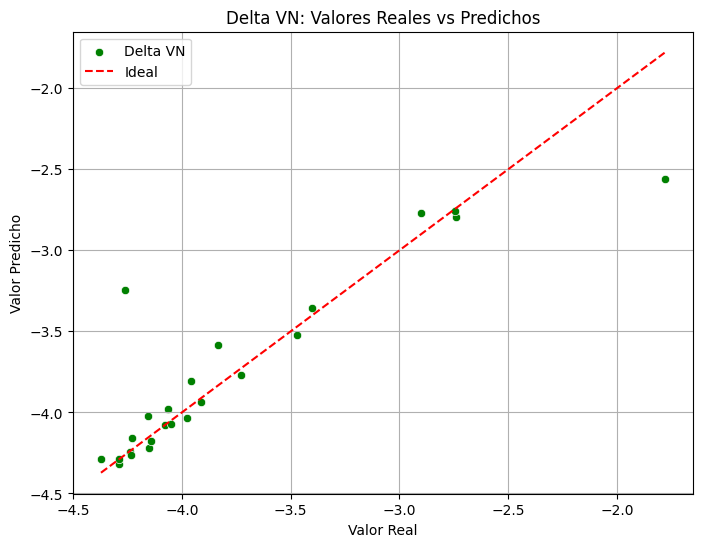

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Crear un DataFrame para analizar las correlaciones
results_df = pd.DataFrame({
    "Fuel_Real": fuel_test,
    "Fuel_Pred": fuel_pred,
    "DeltaVN_Real": delta_vn_test,
    "DeltaVN_Pred": delta_vn_pred
})

# Calcular la correlación entre las variables
correlation_matrix = results_df.corr()

# Crear el mapa de calor para correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor: Correlación entre Variables")
plt.show()

# Visualización de dispersión para Fuel Consumed
plt.figure(figsize=(8, 6))
sns.scatterplot(x=fuel_test, y=fuel_pred, color="blue", label="Fuel Consumed")
plt.plot([fuel_test.min(), fuel_test.max()], [fuel_test.min(), fuel_test.max()], color="red", linestyle="--", label="Ideal")
plt.title("Fuel Consumed: Valores Reales vs Predichos")
plt.xlabel("Valor Real")
plt.ylabel("Valor Predicho")
plt.legend()
plt.grid()
plt.show()

# Visualización de dispersión para Delta VN
plt.figure(figsize=(8, 6))
sns.scatterplot(x=delta_vn_test, y=delta_vn_pred, color="green", label="Delta VN")
plt.plot([delta_vn_test.min(), delta_vn_test.max()], [delta_vn_test.min(), delta_vn_test.max()], color="red", linestyle="--", label="Ideal")
plt.title("Delta VN: Valores Reales vs Predichos")
plt.xlabel("Valor Real")
plt.ylabel("Valor Predicho")
plt.legend()
plt.grid()
plt.show()
